In [11]:
import math
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

In [12]:
# Defining our mathematical function
def func (x=None, y=None):
    """
    Receives: x e y
    Returns: math.exp(-(x**2 + y**2)) + 2*math.exp(-( (x-1.7)**2 + (y-1.7)**2 ))
    """
    try:
        return math.exp(-(x**2 + y**2)) + 2*math.exp(-( (x-1.7)**2 + (y-1.7)**2 )) 
    except:
        print('Mistake at func() method')
        return None

Ponto atual é o ótimo
(21.559292911256307, 20.859292911256308)
Para os parâmetros definidos, fizemos nosso melhor!


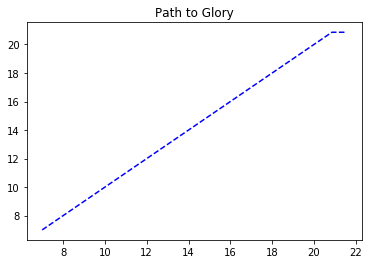

In [10]:
# Declaração da função 'radial_dir' que fará o trabalho sujo para nós
def radial_dir(pos_init, p=0.1, ob='mini'):
    """
    Receives: (1) posição inicial = tupla com x e y 
              (2) tamanho dos passos radiais = float 
              (3) função objetiva
              (4) objetivo sendo 'maxi' ou 'mini'
    Processa: 8 vizinhanças na redondeza da pos_init
    Retorna: tupla com uma tuple dos pares da menor posição em relação à pos_init e uma flag 
            'eh_minimo' que aponta se chegou ao mínimo possível ou ainda não
    """

    eh_minimo = False

    # Valida se a tupla possui dois argumentos, a coordenada X e a coordenada Y
    if (len(pos_init) != 2):
        print('Argumentos inválidos.')
        return False
    
    # Atribui as coordenadas às variáveis x0 e y0
    x0 = pos_init[0]
    y0 = pos_init[1]

    # Crio um dicionário para mapear os deltas para cada coordenada da redondeza.
    # Minha estratégia foi colocar os deltas como keys e as coordenadas como values.
    # Isso vai simplifcar a análise mais a frente.
    
    dicti = {}

    try:
            
        # V1
        dicti[func(x0, y0) - func(x0, y0+p)] = (x0, y0+p)
        # V2
        dicti[func(x0, y0) - func(x0 + p/(2**(0.5)), y0 + p/(2**(0.5)))] = (x0 + p/(2**(0.5)), y0 + p/(2**(0.5)))
        # V3
        dicti[func(x0, y0) - func(x0 + p, y0)] = (x0 + p, y0)
        # V4
        dicti[func(x0, y0) - func(x0 + p/(2**(0.5)), y0 - p/(2**(0.5)))] = (x0 + p/(2**(0.5)), y0 - p/(2**(0.5)))
        # V5
        dicti[func(x0, y0) - func(x0 , y0-p)] = (x0 , y0-p)
        # V6
        dicti[func(x0, y0) - func(x0 - p/(2**(0.5)), y0 - p/(2**(0.5)))] = (x0 - p/(2**(0.5)), y0 - p/(2**(0.5)))
        # V7
        dicti[func(x0, y0) - func(x0 - p, y0)] = (x0 - p, y0)
        # V8
        dicti[func(x0, y0) - func(x0 - p/(2**(0.5)), y0 + p/(2**(0.5)))] = (x0 - p/(2**(0.5)), y0 + p/(2**(0.5)))

    except:
        print('Houve alguma falha na construção do dicionário.')

    try:
        # Vamos abordar primeiro a minimização. Nesse caso, buscaremos ponto cujo delta 
        # entre (posição atual) - (posição calculada) seja o maior possível.
        # Caso não haja nenhum delta positivo, nesse caso, o ponto atual é o ponto ótimo.
        if (ob == 'mini'):
            if(max(dicti.keys()) <= 0):
                print('Ponto atual é o ótimo')
                print((x0, y0))
                eh_minimo = True
                return ((x0, y0), eh_minimo)
            else:
#                 print('Seguem coordenadas para minimização')
#                 print(dicti[max(dicti.keys())])
                return (dicti[max(dicti.keys())], eh_minimo )

        # Vamos abordar agora a maximização. Nesse caso, buscaremos ponto cujo delta 
        # entre (posição atual) - (posição calculada) seja o menor possível.
        # Caso não haja nenhum delta negativo, nesse caso, o ponto atual é o ponto ótimo.
            
        elif(ob == 'maxi'):
            if(min(dicti.keys()) >= 0):
                print('Ponto atual é o ótimo')
                print((x0, y0))
                eh_minimo = True
                return ((x0, y0), eh_minimo)
            else:
#                 print('Seguem coordenadas para maximixação')
#                 print(dicti[min(dicti.keys())])
                return (dicti[min(dicti.keys())], eh_minimo)

    except:
        print('Houve alguma falha no retorno da posição.')


# Defino os parâmetros iniciais
passo = 0.7
pos_init = (7, 7)
ob = 'mini'
rodadas = list(range(40))

# Executo o pragama 'r' vezes consecutivas perseguindo o objetivo de otimização
# Além disso, farei registro das coordenadas para plotar o caminho percorrido
eixoX, eixoY = [pos_init[0]], [pos_init[1]]
for r in rodadas:
    pos_init, flag = radial_dir(pos_init, p=passo, ob=ob)
    eixoX.append(pos_init[0])
    eixoY.append(pos_init[1])
    if (flag):
        print('Para os parâmetros definidos, fizemos nosso melhor!')
        break

# Plotando os resultados

plt.figure('Path')
plt.title('Path to Glory')
plt.plot(eixoX, eixoY, '--', color='blue')
plt.show()

In [24]:
x = np.linspace(-10,10, 100)

In [25]:
y = np.linspace(-10, 10, 100)

In [34]:
r = np.array([func(x[i], y[i]) for i in range(len(x))])

In [37]:
X, Y, Z = axes3d.get_test_data(0.05)

AttributeError: Unknown property rstride

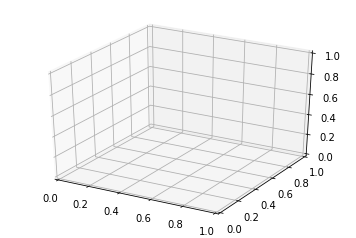

In [42]:
fig = plt.figure('3D surface')
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x, y, r, rstride=10, cstride=10)

plt.show()